This is a Notebook created to help with TI preparation for NLP positions
For NLTK part, I used cheatsheet from https://computingeverywhere.soc.northwestern.edu/wp-content/uploads/2017/07/Text-Analysis-with-NLTK-Cheatsheet.pdf

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

1) Demonstrable proficiency in natural language processing (NLP) techniques and tools, such as NLTK, spaCy, or BERT (Essential).
2) Knowledge of machine learning algorithms and models, such as neural networks, support vector machines, or decision trees, to train NLP models (Essential).
3) Expertise in text mining and information retrieval techniques to extract relevant information from patent documents (Essential).
4) Familiarity with ontology development and semantic web technologies to create and maintain knowledge graphs or ontologies that represent relationships between entities and concepts in patent documents (Essential).
5) Understanding of entity recognition, co-reference resolution, and semantic role labelling to identify named entities and their relationships in patent documents (Essential).
6) Ability to perform sentiment analysis on patent documents to understand the attitudes and opinions expressed in the text (Essential).
7) Knowledge of deep learning models for language modelling and text classification to develop predictive models for patent analytics (Essential).
8) Familiarity with data visualization techniques to present the results of NLP analysis in an intuitive and actionable manner. (Advantageous).


In [2]:
import nltk
nltk.download('punkt')

import spacy
spacy.cli.download("en_core_web_sm")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<a id='nltk'></a>

## NLPK

-  [Importing package and data](#import)
-  [Tokenization](#tokens)
-  [Converting to Text object](#converting)
-  [Concordance](#concordance)
-  [Similar words](#similar)
-  [Common context](#common)
-  [Counting](#counting)
-  [Plot of top most frequent words](#plot)
-  [Words used just once(hapaxes)](#hapaxes)
-  [Normalization](#normalization)
-  [Stop words](#stop_words)
-  [Searching](#searching)
-  [Collocations](#collocations)
-  [Ngrams](#ngrams)
-  [Tagging](#tagging)


<a id="import"></a>

### Importing package and data

-  [To NLTK start](#nltk)

In [23]:
import nltk
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
from nltk.book import text1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package tr

In [70]:
# read your own text
with open("sample.txt", encoding="utf-8") as my_file:
    raw_text = my_file.read()
    tokens = nltk.word_tokenize(raw_text)
    text = nltk.Text(tokens)
    
print(f"type of raw_text: {type(raw_text)}")    
print(f"type of tokens: {type(tokens)}")    
print(f"type of text: {type(text)}")    

type of raw_text: <class 'str'>
type of tokens: <class 'list'>
type of text: <class 'nltk.text.Text'>


<a id="tokens"></a>

### Tokenization

-  [To NLTK start](#nltk)

In [66]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [67]:
sentences = sent_tokenize(raw_text)
# people use words  or tokens interchangeably
words = word_tokenize(raw_text)
print(f"type of sentences: {type(sentences)}, first element: {sentences[0]}")    
print(f"type of words: {type(words)}, first element: {words[0]}")    

type of sentences: <class 'list'>, first element: State-of-the-art Machine Learning for PyTorch, TensorFlow, and JAX.
type of words: <class 'list'>, first element: State-of-the-art


<a id="converting"></a>

### Converting to Text object

-  [To NLTK start](#nltk)

In [68]:
text = nltk.Text(words)
print(f"type of text: {type(text)}, first element: {text[0]}")    

type of text: <class 'nltk.text.Text'>, first element: State-of-the-art


<a id="concordance"></a>

### Concordance (matches)

-  [To NLTK start](#nltk)

In [69]:
text.concordance("language")

Displaying 2 of 2 matches:
t modalities , such as : 📝 Natural Language Processing : text classification ,
recognition , question answering , language modeling , summarization , transla


<a id="similar"></a>

### Similar words

-  [To NLTK start](#nltk)

In [65]:
text1.similar("day")

whale night time sea that boat man captain moment chase in heart and
all of case but lord thing when


<a id="common"></a>

### Common_contexts (both words used in same context)

-  [To NLTK start](#nltk)

In [64]:
text1.common_contexts(["day","night"])
# the day previous, the night previous
# the day of, the night of

the_previous the_of the_before by_or all_i all_and by_and the_and
this_in the_had one_the all_in the_wore through_into


<a id="counting"></a>

### Counting

-  [To NLTK start](#nltk)

In [168]:
print(f"Count of tokens: {len(text)}")
print(f"Count of unique tokens: {len(set(text))}")

Count of tokens: 218361
Count of unique tokens: 16948


In [169]:
text1.count("day")

172

In [108]:
# creates a new data object that contains information
fd = nltk.FreqDist(text1) 
print(f"type of FreqDist: {type(fd)}")
print(f"frequency of the word 'day': {fd['day']}")
print(f"keys: at all we have {len(fd.keys())} keys")
print(f"keys: at all we have {len(fd.items())} items")


type of FreqDist: <class 'nltk.probability.FreqDist'>
frequency of the word 'day': 172
keys: at all we have 19317 keys
keys: at all we have 19317 items


<a id="plot"></a>

### Plot of top N  most frequent words

-  [To NLTK start](#nltk)

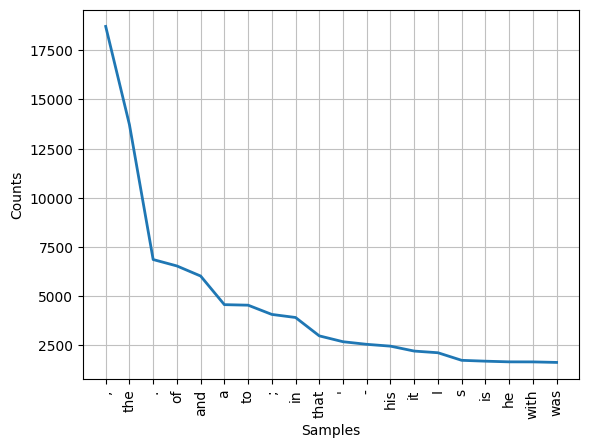

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [112]:
fd.plot(20,cumulative=False) 

<a id="hapaxes"></a>

### Words used just once (hapaxes)

-  [To NLTK start](#nltk)

In [114]:
fd.hapaxes()[:10]

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly']

<a id="normalization"></a>

### Normalization

-  [To NLTK start](#nltk)

In [121]:
# keep alphabetic tokens
text_1_filtered = [w for w in text1 if w.isalpha() ] 
# lowercase
text_1_filtered = [w.lower() for w in text_1_filtered]
text_1_filtered

['moby',
 'dick',
 'by',
 'herman',
 'melville',
 'etymology',
 'supplied',
 'by',
 'a',
 'late',
 'consumptive',
 'usher',
 'to',
 'a',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 'threadbare',
 'in',
 'coat',
 'heart',
 'body',
 'and',
 'brain',
 'i',
 'see',
 'him',
 'now',
 'he',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 'with',
 'a',
 'queer',
 'handkerchief',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 'he',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 'while',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale',
 'fish',
 'is',
 'to',
 'be',
 'called',
 'in',
 'our',
 'tongue',
 'leaving',
 'out',
 'through',
 'ignorance',
 'the',
 'letter',
 'h',
 'which',
 'almos

<a id="stop_words"></a>

### Remove stop words

-  [To NLTK start](#nltk)

In [123]:
stopwords = ["the","it","she","he"]
text_1_filtered = [w for w in text_1_filtered if w not in stopwords]

In [127]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
print(f"type of stopwords: {type(stopwords)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...


type of stopwords: <class 'list'>


[nltk_data]   Unzipping corpora\stopwords.zip.


<a id="searching"></a>

### Searching

-  [To NLTK start](#nltk)

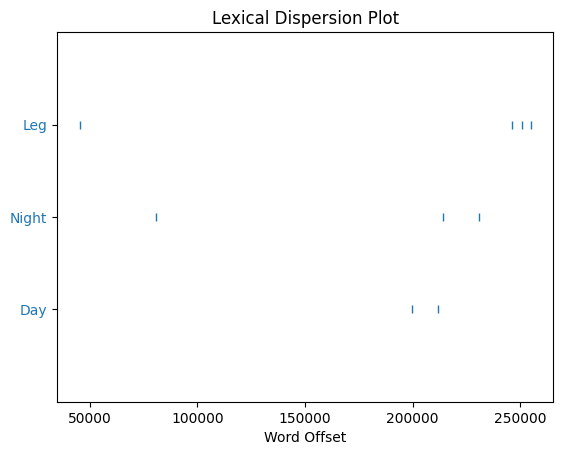

In [132]:
text1.dispersion_plot(["Day","Night","Leg"])

In [141]:
text_filtered_2 = [w for w in text if w.endswith("ness")]
text_filtered_2 = [w for w in text_filtered_2 if "es" in w]
text_filtered_2 = [w for w in text_filtered_2 if "ee" in w and w.startswith("b")]
text_filtered_2

['breezelessness']

In [143]:
import re
text_filtered_3 = [w for w in text1 if re.search('^ab',w)] 

<a id="collocations"></a>

### Collocations

-  [To NLTK start](#nltk)

In [148]:
#Collocations are good for getting a quick glimpse of what a text is about
#Common locations of words
text1.collocations() 

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


<a id="ngrams"></a>

### Ngrams

-  [To NLTK start](#nltk)

In [155]:
# bigrams
bigrams = nltk.bigrams(text1)
print(f"type of bigrams: {type(bigrams)}")
for i in range(4):
    print(next(bigrams))

type of bigrams: <class 'generator'>
('[', 'Moby')
('Moby', 'Dick')
('Dick', 'by')
('by', 'Herman')


In [157]:
# trigrams
trigrams = nltk.trigrams(text1)
print(f"type of trigrams: {type(trigrams)}")
for i in range(4):
    print(next(trigrams))


type of trigrams: <class 'generator'>
('[', 'Moby', 'Dick')
('Moby', 'Dick', 'by')
('Dick', 'by', 'Herman')
('by', 'Herman', 'Melville')


In [159]:
# trigrams
ngrams = nltk.ngrams(text1, 5)
print(f"type of ngrams: {type(ngrams)}")
for i in range(4):
    print(next(ngrams))


type of ngrams: <class 'zip'>
('[', 'Moby', 'Dick', 'by', 'Herman')
('Moby', 'Dick', 'by', 'Herman', 'Melville')
('Dick', 'by', 'Herman', 'Melville', '1851')
('by', 'Herman', 'Melville', '1851', ']')


<a id="tagging"></a>

### Tagging

-  [To NLTK start](#nltk)

In [164]:
nltk.download('averaged_perceptron_tagger')
mytext = nltk.word_tokenize("This is my sentence")
print(f"type of mytext: {type(mytext)}")
nltk.pos_tag(mytext)

type of mytext: <class 'list'>


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\IIatsenko\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'), ('is', 'VBZ'), ('my', 'PRP$'), ('sentence', 'NN')]

In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import requests
import torch
from transformers import BertTokenizer, BertModel

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Example patent document (you can replace this with your document)
patent_text = """
Your patent text goes here.
"""

# NLTK for tokenization
sentences = sent_tokenize(patent_text)
words = word_tokenize(patent_text)

# spaCy for entity recognition and further processing
doc = nlp(patent_text)

# Extract entities using spaCy
entities = [(entity.text, entity.label_) for entity in doc.ents]

# BERT for embeddings
input_ids = tokenizer.encode(patent_text, return_tensors='pt')
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs[0]

# Process embeddings or perform information retrieval tasks here

# Example of printing tokenized sentences, words, entities, and BERT embeddings
print("Tokenized Sentences:", sentences)
print("Tokenized Words:", words)
print("Entities:", entities)
print("BERT Embeddings:", embeddings)


SSLError: (MaxRetryError("HTTPSConnectionPool(host='cdn-lfs.huggingface.co', port=443): Max retries exceeded with url: /bert-base-uncased/68d45e234eb4a928074dfd868cead0219ab85354cc53d20e772753c6bb9169d3?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1704629938&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNDYyOTkzOH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9iZXJ0LWJhc2UtdW5jYXNlZC82OGQ0NWUyMzRlYjRhOTI4MDc0ZGZkODY4Y2VhZDAyMTlhYjg1MzU0Y2M1M2QyMGU3NzI3NTNjNmJiOTE2OWQzP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=yh4gVvcj4Sx4PUWxvEoQwWR31vkG8RIq-I6Iw24zAVfrPbnqpjb~X8DOFDha5ZHWtkHKgihXod6fF09AQaq-OBR9e6QOKPkjinB5s0bI84AfgoxBXrJGNsTJN4K3-ExxrNPO1e1dMYRzjWJhYwwuRxV92gPGeHbr9aUBWo1U3OWCXx~FRoJnqj7SXhMSAsl95~kXeZCwlNMfX2GVMI~OlTMoIXs-TAoa4wFQ9uWxNG-2msZ-KI2GTwY8QP9WqBeB1IOH9LDspUdVO6zBQZEdFAPV2EwYQmC3KWr9OL2~deToxhkoNv0VPGHWvhrzXksSJSUjVIBq0o547zjbs26e-Q__&Key-Pair-Id=KVTP0A1DKRTAX (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)')))"), '(Request ID: 2934c096-9c82-43a5-92c1-3ab98a6e7694)')